In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import codecs

# Task 1: Data exploration 

{'Number of sentences': 1920209, 'Average length (English)': 148.39319626144862, 'Average length (German)': 167.1154806586158, 'Length difference (English - German)': -18.722284397167183, 'Average word length (English)': 4.978014412815271, 'Average word length (German)': 6.2422196800978185, 'Average words per sentence (English)': 24.936005924355108, 'Average words per sentence (German)': 23.234077644673054}


<Figure size 1296x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='en', ylabel='Count'>

<AxesSubplot:xlabel='en', ylabel='Count'>

Text(0.5, 1.0, 'Sentence Length Distribution')

Text(0.5, 0, 'Sentence Length')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, 'Sentence Length Difference (English - German)')

Text(0.5, 0, 'Length Difference')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:xlabel='en_avg_word_length', ylabel='Count'>

<AxesSubplot:xlabel='en_avg_word_length', ylabel='Count'>

Text(0.5, 1.0, 'Average Word Length Distribution')

Text(0.5, 0, 'Average Word Length')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

<AxesSubplot:xlabel='en_word_count', ylabel='Count'>

<AxesSubplot:xlabel='en_word_count', ylabel='Count'>

Text(0.5, 1.0, 'Words per Sentence Distribution')

Text(0.5, 0, 'Number of Words')

Text(0, 0.5, 'Frequency')

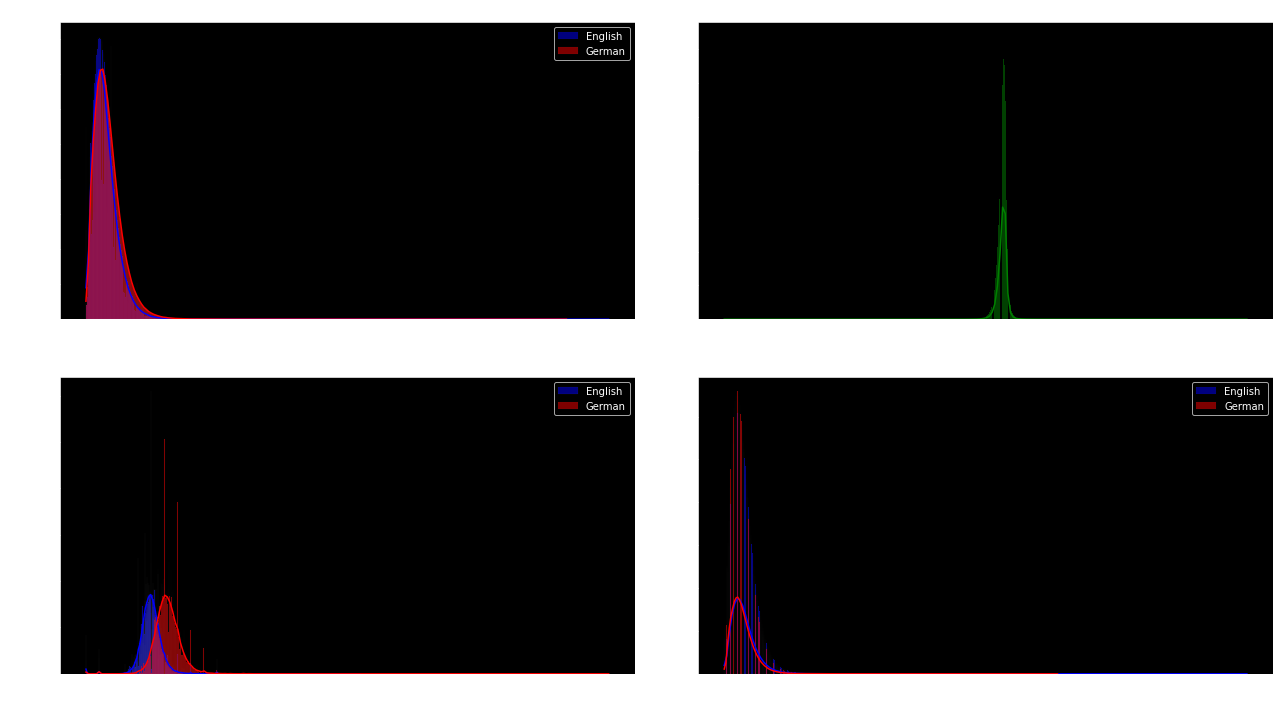

{'Number of sentences': 192021, 'Average length (English)': 148.31669973596638, 'Average length (German)': 166.98837106358158, 'Length difference (English - German)': -18.671671327615208, 'Average word length (English)': 4.978805281771539, 'Average word length (German)': 6.2420487538122105, 'Average words per sentence (English)': 24.92369584576687, 'Average words per sentence (German)': 23.225881544206104}


In [20]:
# File paths
en_file_path = 'de-en/europarl-v7.de-en.en'  # English language file
de_file_path = 'de-en/europarl-v7.de-en.de'  # German language file

# Read the files using codecs to handle potential codec errors
with codecs.open(en_file_path, 'r', encoding='utf-8', errors='ignore') as en_file:
    en_sentences = en_file.readlines()

with codecs.open(de_file_path, 'r', encoding='utf-8', errors='ignore') as de_file:
    de_sentences = de_file.readlines()

# Create a DataFrame
df = pd.DataFrame({'en': en_sentences, 'de': de_sentences})

# Data cleaning: strip whitespace
df['en'] = df['en'].str.strip()
df['de'] = df['de'].str.strip()

# Basic statistics
num_sentences = len(df)
en_lengths = df['en'].str.len()
de_lengths = df['de'].str.len()
length_diff = en_lengths - de_lengths

# Function to calculate average word length
def avg_word_length(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

# Calculate average word length for each sentence
df['en_avg_word_length'] = df['en'].apply(avg_word_length)
df['de_avg_word_length'] = df['de'].apply(avg_word_length)

# Calculate average number of words per sentence
df['en_word_count'] = df['en'].str.split().apply(len)
df['de_word_count'] = df['de'].str.split().apply(len)

# Summary statistics
summary_stats = {
    'Number of sentences': num_sentences,
    'Average length (English)': en_lengths.mean(),
    'Average length (German)': de_lengths.mean(),
    'Length difference (English - German)': length_diff.mean(),
    'Average word length (English)': df['en_avg_word_length'].mean(),
    'Average word length (German)': df['de_avg_word_length'].mean(),
    'Average words per sentence (English)': df['en_word_count'].mean(),
    'Average words per sentence (German)': df['de_word_count'].mean()
}

print(summary_stats)

# Visualize the data
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
sns.histplot(en_lengths, kde=True, color='blue', label='English')
sns.histplot(de_lengths, kde=True, color='red', label='German')
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(length_diff, kde=True, color='green')
plt.title('Sentence Length Difference (English - German)')
plt.xlabel('Length Difference')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(df['en_avg_word_length'], kde=True, color='blue', label='English')
sns.histplot(df['de_avg_word_length'], kde=True, color='red', label='German')
plt.title('Average Word Length Distribution')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(df['en_word_count'], kde=True, color='blue', label='English')
sns.histplot(df['de_word_count'], kde=True, color='red', label='German')
plt.title('Words per Sentence Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Data sampling: randomly select 10% of the data
sample_df = df.sample(frac=0.1, random_state=42)

# Save the sampled data to CSV files (optional)
sample_df.to_csv('sampled_europarl_de_en.csv', index=False)

# Summary statistics for sampled data
sample_summary_stats = {
    'Number of sentences': len(sample_df),
    'Average length (English)': sample_df['en'].str.len().mean(),
    'Average length (German)': sample_df['de'].str.len().mean(),
    'Length difference (English - German)': (sample_df['en'].str.len() - sample_df['de'].str.len()).mean(),
    'Average word length (English)': sample_df['en_avg_word_length'].mean(),
    'Average word length (German)': sample_df['de_avg_word_length'].mean(),
    'Average words per sentence (English)': sample_df['en_word_count'].mean(),
    'Average words per sentence (German)': sample_df['de_word_count'].mean()
}

print(sample_summary_stats)